task1(a) trajectory following

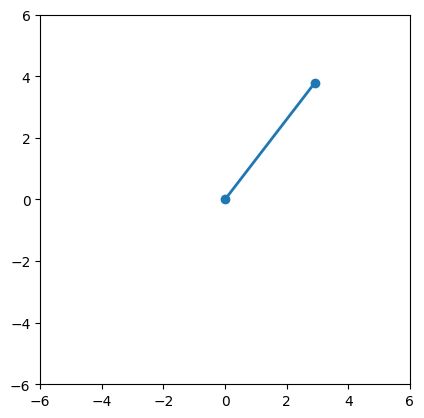

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import display, HTML


# Kinematic parameters
L1 = 2  # Length of the first link
L2 = 3  # Length of the second link

# Initial joint angles
q1_initial = np.pi / 4
q2_initial = np.pi / 6

# Trajectory parameters
num_points = 100
t = np.linspace(0, 2 * np.pi, num_points)
x_trajectory = 0.5 * np.cos(t)
y_trajectory = 0.5 * np.sin(t)

# Visualization setup
fig, ax = plt.subplots()
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.set_aspect('equal')
line, = ax.plot([], [], 'o-', lw=2)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    q1 = q1_initial + 0.5 * np.sin(0.1 * i)
    q2 = q2_initial + 0.3 * np.cos(0.05 * i)

    x = L1 * np.cos(q1) + L2 * np.cos(q1+q2)
    y = L1 * np.sin(q1) + L2 * np.sin(q1+q2)

    line.set_data([0, x], [0, y])
    return line,

ani = FuncAnimation(fig, animate, frames=num_points, init_func=init, blit=True)


# Display the animation using the IPython display function
display(HTML(ani.to_jshtml()))


plt.show()

task1(b)

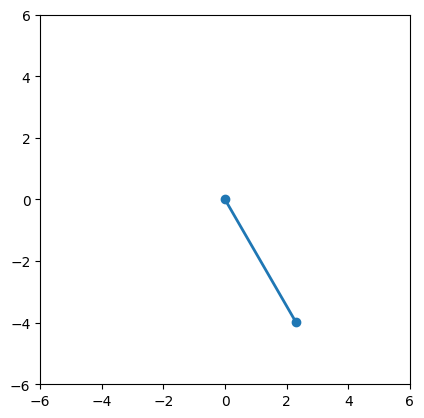

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.integrate import solve_ivp
from IPython.display import display, HTML


# Kinematic and dynamic parameters
L1 = 2
L2 = 3
m1 = 1.0
m2 = 1.0
g = 9.81
friction = 0.1

# Initial joint angles and velocities
q1_initial = np.pi / 4
q2_initial = np.pi / 6
q1_dot_initial = 0.0
q2_dot_initial = 0.0

# Trajectory parameters
num_points = 100
t = np.linspace(0, 2 * np.pi, num_points)
x_trajectory = 0.5 * np.cos(t)
y_trajectory = 0.5 * np.sin(t)

# Dynamics function
def dynamics(t, state):
    q1, q2, q1_dot, q2_dot = state

    # Equations of motion
    c1 = np.cos(q1)
    s1 = np.sin(q1)
    c2 = np.cos(q2)
    s2 = np.sin(q2)

    M = np.array([[m1 * L1**2 + m2 * (L1**2 + L2**2 + 2 * L1 * L2 * c2), m2 * (L2**2 + L1 * L2 * c2)],
                  [m2 * (L2**2 + L1 * L2 * c2), m2 * L2**2]])

    C = np.array([[-2 * m2 * L1 * L2 * s2 * q2_dot, -m2 * L1 * L2 * s2 * q2_dot],
                  [m2 * L1 * L2 * s2 * q1_dot, 0]])

    G = np.array([(m1 * L1 + m2 * L1) * g * s1 + m2 * g * L2 * np.sin(q1 + q2),
                  m2 * g * L2 * np.sin(q1 +q2)])

    friction_torque = np.array([-friction * q1_dot, -friction * q2_dot])

    dynamics = np.linalg.solve(M, -(C @ np.array([q1_dot, q2_dot]) + G + friction_torque))

    return [q1_dot,q2_dot, dynamics[0], dynamics[1]]

# Simulate dynamics
sol = solve_ivp(dynamics, [t[0], t[-1]], [q1_initial, q2_initial, q1_dot_initial, q2_dot_initial], t_eval=t)

# Visualization setup
fig, ax = plt.subplots()
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.set_aspect('equal')
line, = ax.plot([], [], 'o-', lw=2)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    q1 = sol.y[0, i]
    q2 = sol.y[1, i]

    x = L1 * np.cos(q1) + L2 * np.cos(q1 + q2)
    y = L1 * np.sin(q1) + L2 * np.sin(q1 + q2)

    line.set_data([0, x], [0, y])
    return line,

ani = FuncAnimation(fig, animate, frames=num_points, init_func=init, blit=True)

# Display the animation using the IPython display function
display(HTML(ani.to_jshtml()))


plt.show()

task2 apply a force on wall.

<ipython-input-30-cca49bcc542f>:39: RuntimeWarning: invalid value encountered in sqrt
  q2 = np.arctan2(-np.sqrt(1 - D**2), D)


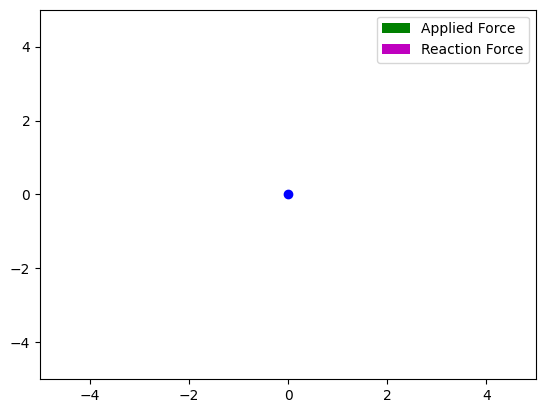

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import display, HTML

# Constants
L1 = 2  # Length of the first link
L2 = 3  # Length of the second link

# Desired trajectory (list of (x, y) coordinates)
trajectory = [(1, 2), (-2, -3), (3, 4), (0, 0)]

# Create a figure and axis for the animation
fig, ax = plt.subplots()
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)

# Initialize manipulator configuration (theta1, theta2)
q1 = np.pi / 4
q2 = np.pi / 6

# External force applied by the manipulator's end-effector on the wall
force_magnitude = 5.0  # Magnitude of the force
force_angle = np.pi / 3  # Angle of the force with respect to the end-effector

# Initialize empty lists to store animation data
x_positions = []
y_positions = []

# Define the forward kinematics function
def forward_kinematics(q1, q2):
    x = L1 * np.cos(q1) + L2 * np.cos(q2)
    y = L1 * np.sin(q1) + L2 * np.sin(q2)
    return x, y

    # Define the inverse kinematics function
def inverse_kinematics(x, y):
    D = (x**2 + y**2 - L1**2 - L2**2) / (2 * L1 * L2)
    q2 = np.arctan2(-np.sqrt(1 - D**2), D)
    q1 = np.arctan2(y, x) - np.arctan2(L2 * np.sin(q2), L1 + L2 * np.cos(q2))
    return q1, q2

# Animation update function
def update(frame):
    global q1, q2  # Declare the variables as global

    ax.clear()

    # Get the current target point from the trajectory
    target_x, target_y = trajectory[frame]

    # Calculate the desired joint angles using inverse kinematics
    target_q1, target_q2 = inverse_kinematics(target_x, target_y)

    # Interpolate the joint angles towards the desired values
    q1_diff = (target_q1 - q1) * 0.1
    q2_diff = (target_q2 - q2) * 0.1
    q1 += q1_diff
    q2 += q2_diff

    # Calculate end effector position
    x, y = forward_kinematics(q1, q2)

    # Store position for animation
    x_positions.append(x)
    y_positions.append(y)

    # Plot manipulator links
    ax.plot([0, L1 * np.cos(q1)], [0, L1 * np.sin(q1)], 'b-o')
    ax.plot([L1 * np.cos(q1), x], [L1 * np.sin(q1), y], 'r-o')

    # Calculate force components
    force_x = force_magnitude * np.cos(force_angle)
    force_y = force_magnitude * np.sin(force_angle)

    # Calculate reaction force components (equal and opposite to applied force)
    reaction_force_x = -force_x
    reaction_force_y = -force_y

    # Plot applied force vector
    ax.quiver(x, y, force_x, force_y, angles='xy', scale_units='xy', scale=1, color='g', label='Applied Force')

    # Plot reaction force vector
    ax.quiver(x, y, reaction_force_x, reaction_force_y, angles='xy', scale_units='xy', scale=1, color='m', label='Reaction Force')

    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.legend()

# Create the animation
ani = FuncAnimation(fig, update, frames=len(trajectory), interval=1000)

# Display the animation using the IPython display function
display(HTML(ani.to_jshtml()))

plt. show()




task4 If both joint angles can only sweep between 35 degrees and 145 degrees,
determine and plot the workspace for the robot.

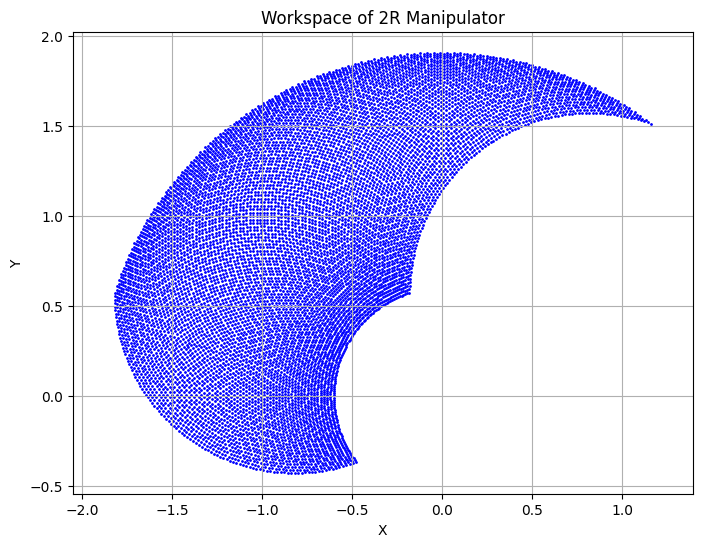

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Kinematic parameters
L1 = 1.0
L2 = 1.0

# Joint angle range (in radians)
theta_min = np.deg2rad(35)
theta_max = np.deg2rad(145)

# Generate joint angle combinations
num_angles = 100
theta1_values = np.linspace(theta_min, theta_max, num_angles)
theta2_values = np.linspace(theta_min, theta_max, num_angles)

# Calculate end-tip positions for all combinations
workspace = []
for theta1 in theta1_values:
    for theta2 in theta2_values:
        x = L1 * np.cos(theta1) + L2 * np.cos(theta1 + theta2)
        y = L1 * np.sin(theta1) + L2 * np.sin(theta1 + theta2)
        workspace.append((x, y))

workspace = np.array(workspace)

# Plot the workspace
plt.figure(figsize=(8, 6))
plt.scatter(workspace[:, 0], workspace[:, 1], s=1, c='b')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Workspace of 2R Manipulator')
plt.grid()
plt.axis('equal')

plt.show()


task3 acts like a spring.

<ipython-input-37-4b80614974d1>:39: RuntimeWarning: invalid value encountered in sqrt
  q2 = np.arctan2(-np.sqrt(1 - D**2), D)


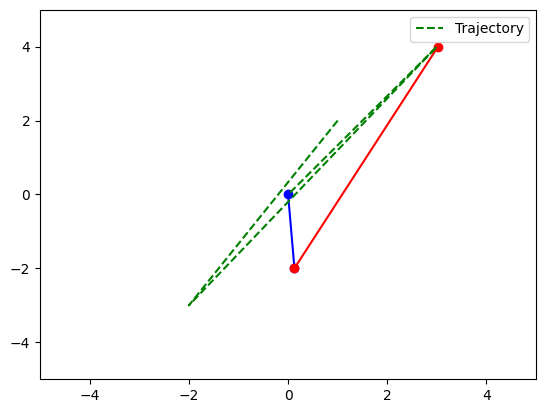

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import display, HTML

# Constants
L1 = 2  # Length of the first link
L2 = 3  # Length of the second link

# Desired trajectory (list of (x, y) coordinates)
trajectory = [(1, 2), (-2, -3), (3, 4), (0, 0)]

# Create a figure and axis for the animation
fig, ax = plt.subplots()
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)

# Initialize manipulator configuration (theta1, theta2)
q1 = np.pi / 4
q2 = np.pi / 6

# Spring-like parameters
k = 0.5  # Spring constant
desired_position = np.array([0, 0])

# Initialize empty lists to store animation data
x_positions = []
y_positions = []

# Define the forward kinematics function
def forward_kinematics(q1, q2):
    x = L1 * np.cos(q1) + L2 * np.cos(q2)
    y = L1 * np.sin(q1) + L2 * np.sin(q2)
    return x, y

     # Define the inverse kinematics function
def inverse_kinematics(x, y):
    D = (x**2 + y**2 - L1**2 - L2**2) / (2 * L1 * L2)
    q2 = np.arctan2(-np.sqrt(1 - D**2), D)
    q1 = np.arctan2(y, x) - np.arctan2(L2 * np.sin(q2), L1 + L2 * np.cos(q2))
    return q1, q2

# Animation update function
def update(frame):
    global q1, q2  # Declare the variables as global

    ax.clear()

    # Get the current target point from the trajectory
    target_x, target_y = trajectory[frame]

    # Calculate the desired joint angles using inverse kinematics
    target_q1, target_q2 = inverse_kinematics(target_x, target_y)

    # Calculate end effector position
    x, y = forward_kinematics(q1, q2)

    # Calculate spring force based on position error
    position_error = np.array([target_x - x, target_y - y])
    spring_force = k * position_error

    # Calculate joint torques based on spring force
    torque1 = spring_force.dot(np.array([-L1 * np.sin(q1), L2 * np.sin(q2)]))
    torque2 = spring_force.dot(np.array([0, -L2 * np.sin(q2)]))

    # Integrate torques to update joint angles
    q1 += torque1
    q2 += torque2

    # Store position for animation
    x_positions.append(x)
    y_positions.append(y)

    # Plot manipulator links and trajectory
    ax.plot([0, L1 * np.cos(q1)], [0, L1 * np.sin(q1)], 'b-o')
    ax.plot([L1 * np.cos(q1), x], [L1 * np.sin(q1), y], 'r-o')
    ax.plot([coord[0] for coord in trajectory], [coord[1] for coord in trajectory], 'g--', label='Trajectory')

    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.legend()

# Create the animation
ani = FuncAnimation(fig, update, frames=len(trajectory), interval=1000)

# Display the animation using the IPython display function
display(HTML(ani.to_jshtml()))


plt.show()
